In [8]:
from sklearn.datasets import load_boston
Boston = load_boston()
print(Boston.data.shape)
import matplotlib.pyplot as plt
import pandas as pd

(506, 13)


df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})


In [10]:
df


,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


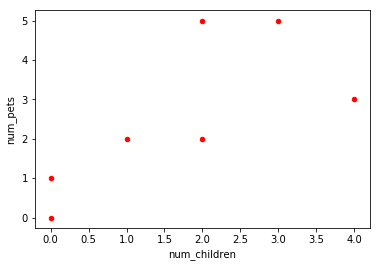

In [11]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

df.plot(kind='bar',x='name',y='age')

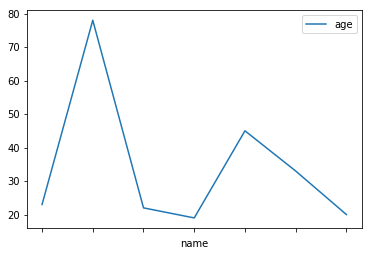

In [13]:
df.plot(x='name',y='age')

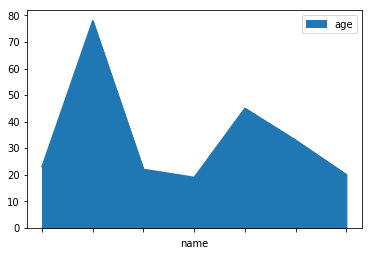

In [14]:
df.plot(kind='area',x='name',y='age')

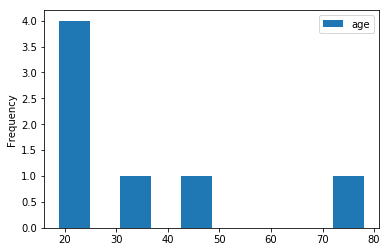

In [15]:
df.plot(kind='hist',x='name',y='age')

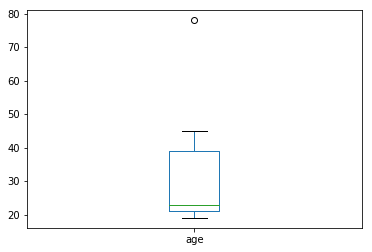

In [16]:
df.plot(kind='box',x='name',y='age')

# GCA GRAPH OF LINE

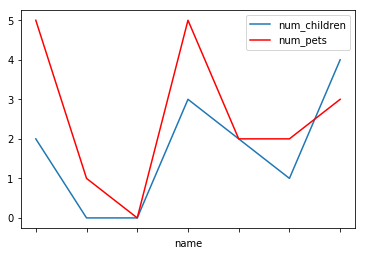

In [25]:
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

# GROUPBY(groupby) & NUNIQUE(nunique)

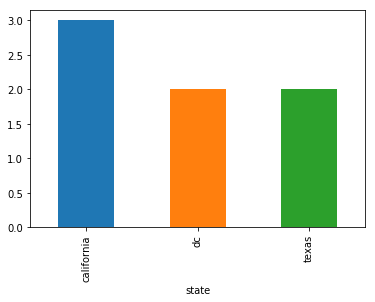

In [26]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

# GROUPBY(groupby) & UNSTACK(unstack)

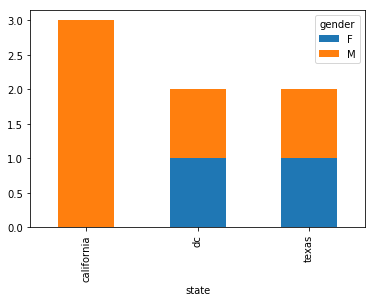

In [27]:
df.groupby(['state','gender'])['name'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

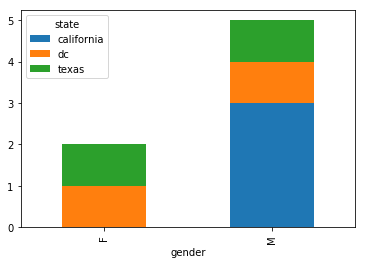

In [28]:
df.groupby(['gender','state'])['age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

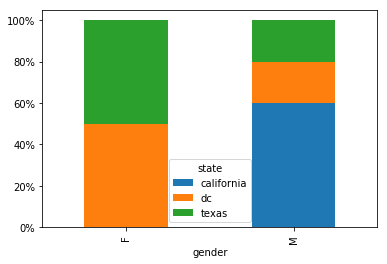

In [29]:
import matplotlib.ticker as mtick

df.groupby(['gender','state'])['age'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

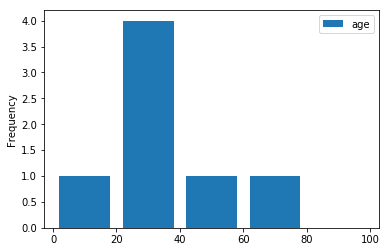

In [30]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [31]:
df = pd.DataFrame({
    'name':['john','lisa','peter','carl','linda','betty'],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

In [32]:
df


,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


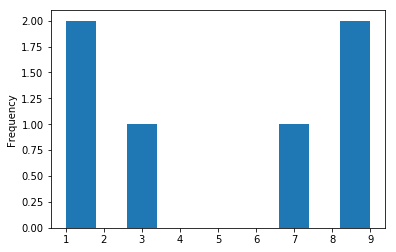

In [33]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)

plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()

# Splitting Data in Training and Testing Set
        Machine Learning = Training + Testing

In [63]:
data = pd.read_csv("data.csv")


In [64]:
data

,City,Age,Smoke,HappinessIndex,Healthy
0,Mumbai,24.0,Yes,241.0,Yes
1,London,80.0,No,928.0,No
2,NewYork,38.0,Yes,NaN,Yes
3,NewYork,22.0,Yes,786.0,Yes
4,NewYork,36.0,Yes,967.0,Yes
5,London,NaN,Yes,665.0,Yes
6,Mumbai,17.0,No,293.0,No
7,NewYork,28.0,No,494.0,Yes
8,Mumbai,45.0,No,707.0,No
9,London,29.0,Yes,599.0,No


In [67]:
mum  = data[data.City == "Mumbai"]

In [68]:
mum

,City,Age,Smoke,HappinessIndex,Healthy
0,Mumbai,24.0,Yes,241.0,Yes
6,Mumbai,17.0,No,293.0,No
8,Mumbai,45.0,No,707.0,No


In [69]:
mum1 = data[data["City"] == "Mumbai"]

In [70]:
mum1

,City,Age,Smoke,HappinessIndex,Healthy
0,Mumbai,24.0,Yes,241.0,Yes
6,Mumbai,17.0,No,293.0,No
8,Mumbai,45.0,No,707.0,No


In [71]:
new = data[data["City"] == "NewYork"]

In [72]:
new

,City,Age,Smoke,HappinessIndex,Healthy
2,NewYork,38.0,Yes,NaN,Yes
3,NewYork,22.0,Yes,786.0,Yes
4,NewYork,36.0,Yes,967.0,Yes
7,NewYork,28.0,No,494.0,Yes


In [74]:
new.Age


2    38.0
3    22.0
4    36.0
7    28.0
Name: Age, dtype: float64

In [75]:
new.Smoke

2    Yes
3    Yes
4    Yes
7     No
Name: Smoke, dtype: object

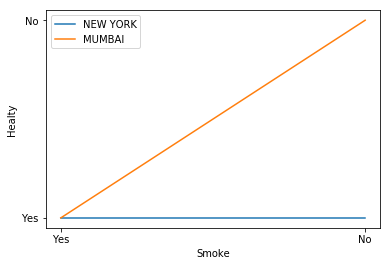

In [85]:
plt.plot(new.Smoke, new.Healthy)
plt.plot(mum1.Smoke, mum1.Healthy)

plt.legend(['NEW YORK', 'MUMBAI'])
plt.xlabel('Smoke')
plt.ylabel('Healty')
plt.show()

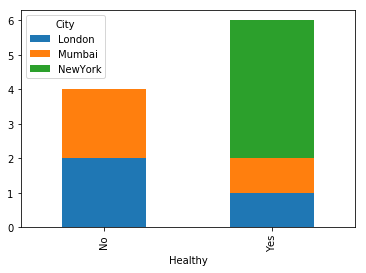

In [88]:
data.groupby(['Healthy','City'])['Age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

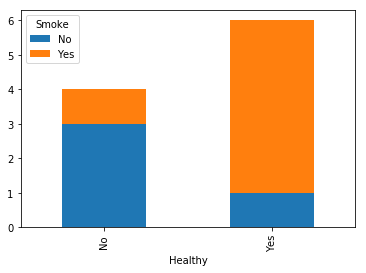

In [95]:
data.groupby(['Healthy','Smoke'])['City'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

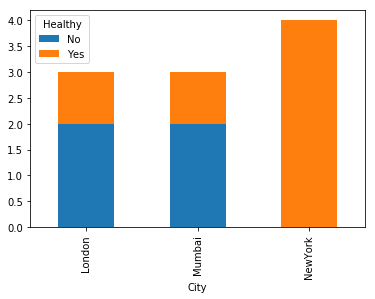

In [90]:
data.groupby(['City','Healthy'])['Age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

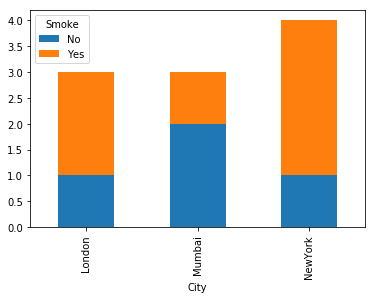

In [94]:
data.groupby(['City','Smoke'])['Healthy'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

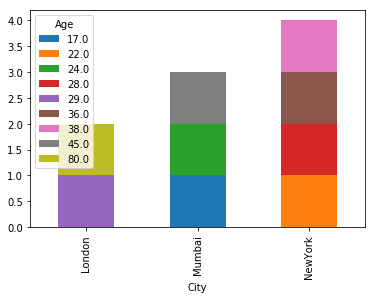

In [91]:
data.groupby(['City','Age'])['Healthy'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

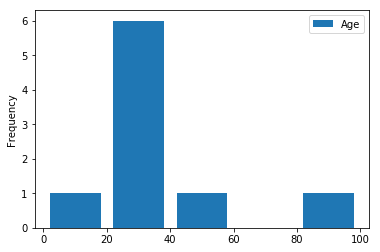

In [87]:
data[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

In [96]:
data.groupby('Healthy').mean()


,Age,HappinessIndex
Healthy,,
No,42.75,631.75
Yes,29.60,630.60


In [100]:
data.groupby('City').mean()

,Age,HappinessIndex
City,,
London,54.500000,730.666667
Mumbai,28.666667,413.666667
NewYork,31.000000,749.000000


In [101]:

# Split into input data(X) and output data(y)
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

In [102]:
X


array([['Mumbai', 24.0, 'Yes', 241.0],
       ['London', 80.0, 'No', 928.0],
       ['NewYork', 38.0, 'Yes', nan],
       ['NewYork', 22.0, 'Yes', 786.0],
       ['NewYork', 36.0, 'Yes', 967.0],
       ['London', nan, 'Yes', 665.0],
       ['Mumbai', 17.0, 'No', 293.0],
       ['NewYork', 28.0, 'No', 494.0],
       ['Mumbai', 45.0, 'No', 707.0],
       ['London', 29.0, 'Yes', 599.0]], dtype=object)

In [104]:
y

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
      dtype=object)

# Splitting Data in Training and Testing Set
            Machine Learning = Training + Testing

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
X_train

array([['London', 80.0, 'No', 928.0],
       ['NewYork', 22.0, 'Yes', 786.0],
       ['Mumbai', 17.0, 'No', 293.0],
       ['NewYork', 38.0, 'Yes', nan],
       ['Mumbai', 24.0, 'Yes', 241.0],
       ['NewYork', 28.0, 'No', 494.0],
       ['Mumbai', 45.0, 'No', 707.0]], dtype=object)

# Basic Plotting, Plotting Terminologies

In [109]:
import numpy as np
x = np.linspace(0, 10, 100) #100 Data equally spaced between 0 to 10
y = np.sin(x)
z = np.cos(x)

In [110]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

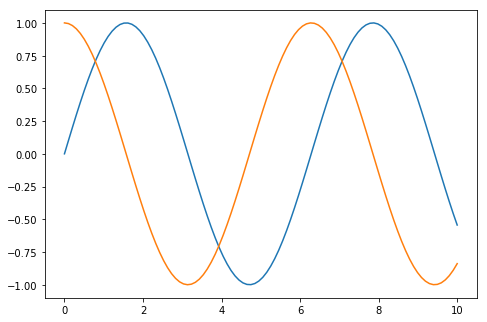

In [112]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
#Params- left, buttom, width, height

ax.plot(x,y)
ax.plot(x,z)

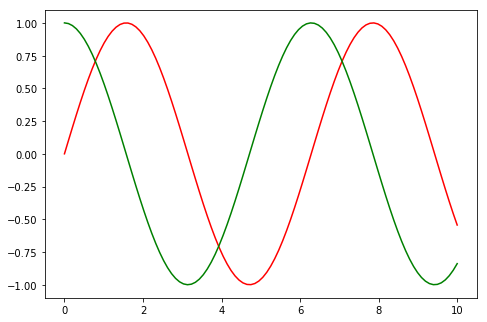

In [113]:

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
#Params- left, buttom, width, height

#Change color of graph
ax.plot(x,y,c='red')
ax.plot(x,z,c='green')

Text(0.5, 1.0, 'Sine and Cosine graph using Matplotlib')

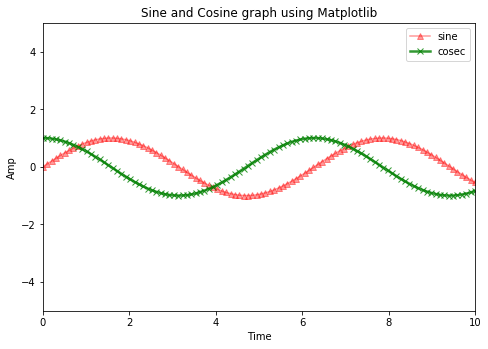

In [119]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
#Params- left, buttom, width, height

#Transparency
ax.plot(x,y,c='red',alpha=0.4,marker='^',label='sine')
ax.plot(x,z,c='green',alpha=0.8, marker='x',lw=2.5,label='cosec')

ax.set_xlim(0,10)
ax.set_ylim(-5,5)

ax.legend()

#Axes title
ax.set_xlabel('Time')
ax.set_ylabel('Amp')
ax.set_title('Sine and Cosine graph using Matplotlib')

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1247fcd68>,
       dtype=object))

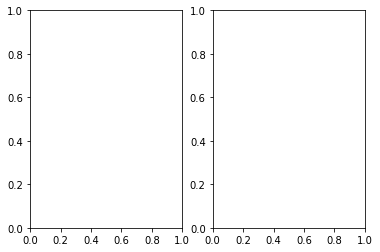

In [120]:

plt.subplots(1,2)

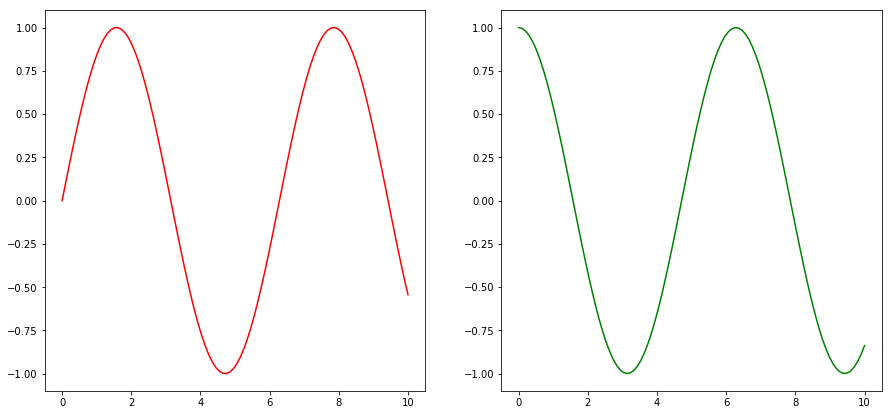

In [122]:
ig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
#type(ax)

# ax[0] --> corresponds to first graph
# ax[1] --> corresponds to second graph

ax[0].plot(x,y,c='red')
ax[1].plot(x,z,c='green')

# This is Barh Graph

<BarContainer object of 10 artists>

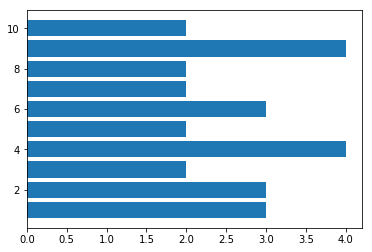

In [124]:

x = [1,2,3,4,5,6,7,8,9,10]
y = [3,3,2,4,2,3,2,2,4,2]
plt.barh(x,y)
#Horizontal Bar Chart